# Home Assignment No. 3: Part 1 

In this part of the homework you are to solve several problems related to machine learning algorithms.
* For every separate problem you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**.
* Your solution must me **COMPLETE**, i.e. contain all required formulas/proofs/detailed explanations.
* You must write your solution for any problem just right after the words **BEGIN SOLUTION**. Attaching pictures of your handwriting is allowed, but **highly discouraged**.
* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of our yown code. There exists a class/method for almost everything you can imagine (related to this homework).
* To do some tasks in this part of homework, you have to write **CODE** directly inside specified places inside notebook **CELLS**.
* In some problems you may be asked to provide short discussion of the results. In this cases you have to create **MARKDOWN** cell with your comments right after the your code cell.
* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e. if the reviewer decides to execute `Kernel` -> `Restart Kernel and Run All Cells`, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest to fix random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include neccessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.
* The are problems with \* mark - they are not obligatory. You can get **EXTRA POINTS** for solving them.
## $\LaTeX$ in Jupyter
Jupyter has constantly improving $\LaTeX$ support. Below are the basic methods to
write **neat, tidy, and well typeset** equations in your notebooks:
* to write an **inline** equation use 
```markdown
$ you latex equation here $
```
* to write an equation, that is **displayed on a separate line** use 
```markdown
$$ you latex equation here $$
```
* to write a **block of equations** use 
```markdown
\begin{align}
    left-hand-side
        &= right-hand-side on line 1
        \\
        &= right-hand-side on line 2
        \\
        &= right-hand-side on the last line
\end{align}
```
The **ampersand** (`&`) aligns the equations horizontally and the **double backslash**
(`\\`) creates a new line.

Write your theoretical derivations within such blocks:
```markdown
**BEGIN Solution**

<!-- >>> your derivation here <<< -->

**END Solution**
```

Please, write your implementation within the designated blocks:
```python
...
### BEGIN Solution

# >>> your solution here <<<

### END Solution
...
```


<br>

In [1]:
import numpy as np
import pandas as pd

# import torch

%matplotlib inline
import matplotlib.pyplot as plt

<br>

# Bayesian Models. GLM

## Task 1 (1 pt.)

Consider a univariate Gaussian distribution $\mathcal{N}(x; \mu, \tau^{-1})$.
Let's define Gaussian-Gamma prior for parameters $(\mu, \tau)$:

\begin{equation}
    p(\mu, \tau)
        = \mathcal{N}(\mu; \mu_0, (\beta \tau)^{-1})
            \otimes \text{Gamma}(\tau; a, b)
        \,.
\end{equation}

Find the posterior distribution of $(\mu, \tau)$ after observing $X = (x_1, \dots, x_n)$.

**BEGIN Solution**
$$
\mathbb{P}(\mu, \tau | X) \propto p(\mu, \tau) \mathbb{P}(X | \mu, \tau)
$$

Since the data are i.i.d, probability for the entire dataset is equal to the product of the of the data samples:
$$
\mathbb{P}(X | \mu, \tau) = \prod_{i=1}^n \mathbb{P}(x_i | \mu, \tau) 
\propto \prod_{i=1}^n \tau^{\frac{1}{2}} \exp{(-\frac{\tau}{2}(x_i - \mu)^2)}
\propto \tau^{\frac{n}{2}} \exp{(-\frac{\tau}{2} \sum_{i=1}^n(x_i - \mu)^2)}
$$

Since $\sum x_i = \sum \overline{x}$, where $\overline{x}$ is an average of $\{x_i\}_{i=1}^n$,
$$
\mathbb{P}(X | \mu, \tau) 
\propto \tau^{\frac{n}{2}} \exp{(-\frac{\tau}{2} \sum_{i=1}^n(x_i - \overline{x} + \overline{x} - \mu)^2)}
\propto \tau^{\frac{n}{2}} \exp{\big (-\frac{\tau}{2} \sum_{i=1}^n(x_i - \overline{x})^2 + (\overline{x} - \mu)^2 \big)}
$$

As a result (simple substitution),
$$
\mathbb{P}(\mu, \tau | X)
\propto
\mathcal{N}(\mu; \mu_0, (\beta \tau)^{-1}) \otimes \text{Gamma}(\tau; a, b)
\cdot \tau^{\frac{n}{2}} \exp{\big (-\frac{\tau}{2} \sum_{i=1}^n(x_i - \overline{x})^2 + (\overline{x} - \mu)^2 \big)}
$$

**END Solution**

<br>

## Task 2 (1 + 1 + 1 = 3 pt.)

Evaluate the following integral using the Laplace approximation:
\begin{equation}
    x \mapsto \int \sigma(w^T x) \mathcal{N}(w; 0, \Sigma) dw \,,
\end{equation}
for $x = \bigl(\tfrac23, \tfrac16, \tfrac16\bigr)\in \mathbb{R}^3$ and 
\begin{equation}
    \Sigma
        = \begin{pmatrix}
             1    & -0.25 & 0.75 \\
            -0.25 &  1    & 0.5  \\
             0.75 &  0.5  & 2
           \end{pmatrix}
        \,.
\end{equation}

### Task 2.1 (1 pt.)
Use the Hessian matrix computed numericaly via finite differences. (Check out [Numdifftools](https://pypi.python.org/pypi/Numdifftools))

In [376]:
import numdifftools as nd
from scipy.optimize import minimize
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [377]:
x = np.array([2 / 3, 1 / 6, 1 / 6], dtype=np.float64)
cov = np.array([[1, -0.25, 0.75],
                [-0.25, 1, 0.5],
                [0.75, 0.5, 2]], dtype=np.float64)
cov_inv = np.linalg.inv(cov)

In [378]:
import math
from scipy.stats import multivariate_normal

pdf = multivariate_normal(mean=[0,] * 3, cov=cov).pdf
    
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def integrand(w):
    return sigmoid(w @ x) * pdf(w)

def target_func(w):
    return -1 * np.log(integrand(w))

In [379]:
hessian = nd.Hessian(target_func)
w_0 = np.array([1, 1, 1], dtype=np.float64)
w_min = minimize(target_func, w_0).x
A = hessian(w_0)
det_A = np.linalg.det(A)

In [380]:
def get_integral(w_min, det_A):
    res = math.exp(-1 * target_func(w_min)) * math.sqrt(math.pow(2 * math.pi, w_min.shape[0]) / det_A)
    return res

In [381]:
### BEGIN Solution
res = get_integral(w_min, det_A)
### END Solution
res

0.5049640151009482

<br>

### Task 2.2 (1 pt.)
Use the diagonal approximation of the Hessian computed by autodifferentiation
in **pytorch**.

In [358]:
import torch
from torch.autograd import Variable, grad

In [359]:
cov_t = torch.from_numpy(cov).detach()
cov_inv_t = torch.from_numpy(cov_inv).detach()
x_t = torch.from_numpy(x).detach()
w_min_t = torch.tensor(w_min, requires_grad=True)

In [360]:
def target_func_torch(w):
    const = 1 / math.pow(2 * math.pi, 3 / 2)
    const *= math.pow(np.linalg.det(cov), -0.5)
    arg = torch.matmul(w, cov_inv_t)
    arg = torch.matmul(arg, w)
    pdf_res = torch.exp(-0.5 * arg)
    sig_res = torch.sigmoid(torch.matmul(w, x_t))
    
    return -1 * torch.log(sig_res * pdf_res)

In [361]:
### BEGIN Solution
hessian_det = 1

res = target_func_torch(w_min_t)

g = grad(res, w_min_t, create_graph=True)

for i in range(3):
    g2 = grad(g[0][i], w_min_t, retain_graph=True)
    hessian_det *= g2[0][i].item()
### END Solution

In [362]:
get_integral(w_min, hessian_det)

0.29643087555354186

<br>

### Task 2.3 (1 pt.)

Compare the results comparing the `absolute errors` of the results (this is possible with Monte-Carlo estimate of the integral). Write 1-2 sentences in the results discussion.

In [446]:
from scipy.integrate import tplquad

# bound
bd = 10

def integrand_tpl(x, y, z):
    return integrand(np.array([x, y, z], dtype=np.float64))

result = tplquad(integrand_tpl, -bd, bd, -bd, bd, -bd, bd)

In [447]:
### BEGIN Solution
print ("Absolute erroro, case 1: %.05f" % abs(result[0] - get_integral(w_min, det_A)))
print ("Absolute erroro, case 2: %.05f" % abs(result[0] - get_integral(w_min, hessian_det)))
### END Solution

Absolute erroro, case 1: 0.00496
Absolute erroro, case 2: 0.20357


**BEGIN Solution**

**END Solution**

<br>

# Gaussian Processes

## Task 3 (1 + 2 = 3 pt.)

### Task 3.1 (1 pt.)

Assuimng the matrices $A \in \mathbb{R}^{n \times n}$ and $D \in \mathbb{R}^{d \times d}$
are invertible, using **gaussian elimination** find the inverse matrix for the following
block matrix:
\begin{equation}
    \begin{pmatrix} A & B \\ C & D \end{pmatrix} \,,
\end{equation}
where $C \in \mathbb{R}^{d \times n}$ and $B \in \mathbb{R}^{n \times d}$.

**BEGIN Solution**

Let's transform block matrix to the identity by elementary transformation, the same transformation should be applied to the identity matrix on the left:

$$
\Bigg(
\begin{array}{cc|cc}
A & B & I_n & 0\\
C & D & 0 & I_d\\
\end{array}
\Bigg)
\sim
\Bigg(
\begin{array}{cc|cc}
I_n & A^{-1}B & A^{-1} & 0\\
C & D & 0 & I_d\\
\end{array}
\Bigg)
\sim
\Bigg(
\begin{array}{cc|cc}
I_n & A^{-1}B & A^{-1} & 0\\
0 & D - C A^{-1}B & - C A^{-1} & I_d\\
\end{array}
\Bigg)
\sim
$$
$$
\sim
\Bigg(
\begin{array}{cc|cc}
I_n & A^{-1}B & A^{-1} & 0\\
0 & I_d & - (D - C A^{-1}B)^{-1} C A^{-1} & (D - C A^{-1}B)^{-1}\\
\end{array}
\Bigg)
\sim
\Bigg(
\begin{array}{cc|cc}
I_n & 0 & A^{-1} + A^{-1}B (D - C A^{-1}B)^{-1} C A^{-1}  & -A^{-1}B(D - C A^{-1}B)^{-1}\\
0 & I_d & - (D - C A^{-1}B)^{-1} C A^{-1} & (D - C A^{-1}B)^{-1}\\
\end{array}
\Bigg)
$$

Result,
$$
\begin{pmatrix} A & B \\ C & D \end{pmatrix}^{-1}
=
\Bigg(
\begin{array}{cc}
A^{-1} + A^{-1}B (D - C A^{-1}B)^{-1} C A^{-1}  & -A^{-1}B(D - C A^{-1}B)^{-1}\\
- (D - C A^{-1}B)^{-1} C A^{-1} & (D - C A^{-1}B)^{-1}\\
\end{array}
\Bigg)
$$


**END Solution**

<br>

### Task 3.2 (2 pt.)

Assume that the function $y(x)$, $x \in \mathbb{R}^d$, is a realization of the Gaussian
Process $GP\bigl(0; K(\cdot, \cdot)\bigr)$ with $K(a, b) = \exp({- \gamma \|a - b\|_2^2}))$.

Suppose two datasets were observed: **noiseless** ${D_0}$ and **noisy** ${D_1}$
\begin{aligned}
    & D_0 = \bigl(x_i, y(x_i) \bigr)_{i=1}^{n} \,, \\
    & D_1 = \bigl(x^\prime_i, y(x^\prime_i) + \varepsilon_i \bigr)_{i=1}^{m} \,,
\end{aligned}
where $\varepsilon_i \sim \text{ iid } \mathcal{N}(0, \sigma^2)$, independent of process $y$.

Derive the conditional distribution of $y(x) \big\vert_{D_0, D_1}$ at a new $x$.

**BEGIN Solution**

Let $\mathbf{f}$ be the known function values of the training cases, and let $\mathbf{f}^*$ be a set of function values corresponding to the test set inputs, $X^∗$.

$$
\Bigg[
\begin{array}{c}
    \mathbf{f} \\
    \mathbf{f}^*
\end{array}
\Bigg]
\sim
\mathcal{N} 
\Bigg(
    \mathbf{0},
    \Bigg[
        \begin{array}{cc}
            K & K_* \\
            K_* & K_{**}
        \end{array}
    \Bigg]
\Bigg)
$$

where $K = \{k(x_i, x_j) | x_i, x_j \in X\}$, $K_* = \{k(x_i, x^*_j) | x_i \in X, x^*_j \in X^*\}$, $K_{**} = \{k(x^*_i, x^*_j) | x^*_i, x^*_j \in X\}$

Let's consider matrix $K$ for mixed training data. Now, training data consists of noiseless ($X_1$) and noisy ($X_0$) samples.

$$
K =
\Bigg[
\begin{array}{cc}
    \Sigma_0 & \Sigma_{01} \\
    \Sigma_{10} & \Sigma_{11}
\end{array}
\Bigg],
\Sigma_0 = \Sigma_0' + \sigma^2I
$$

**END Solution**

<br>

## Task 4 (1 + 2 = 3 pt.)

### Task 4.1 (1 pt.)

> In the late 1950’s Charles Keeling invented an accurate way to measure atmospheric $CO_2$ concentration and began taking regular measurements at the Mauna Loa observatory.


Take `monthly_co2_mlo.csv` file, load it and prepare the data.

0. Load the `CO2 [ppm]` time series
1. Replace $-99.99$ with **NaN** and drop the missing observations
2. Split the time series into train and test
3. Normalize the target value by fitting a transformation on the train
4. Plot the resulting target against the time index

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### BEGIN Solution
data = pd.read_csv('data/monthly_co2_mlo.csv')
data[data == -99.99] = np.nan
data = data.dropna()
y = data['CO2 [ppm]']
X = data.drop(['CO2 [ppm]'], axis=1)
X['year'] -= 1958
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, shuffle=False)
X.head(10)
### END Solution

year  seasonally adjusted [ppm]  fit [ppm]  \
2   0.166667                     314.43     316.19   
3   0.250000                     315.15     317.30   
4   0.333333                     314.72     317.85   
6   0.500000                     315.18     315.87   
7   0.583333                     316.18     314.00   
8   0.666667                     316.08     312.46   
10  0.833333                     315.20     313.62   
11  0.916667                     315.43     314.77   
12  1.000000                     315.55     315.61   
13  1.083333                     315.87     316.26   

    seasonally adjusted fit [ppm]  CO2 filled [ppm]  \
2                          314.90            315.70   
3                          314.98            317.45   
4                          315.06            317.51   
6                          315.22            315.86   
7                          315.29            314.93   
8                          315.35            313.21   
10                         315.46            313.33   
11                         315.52            314.67   
12                         315.57            315.58   
13                         315.64            316.48   

    seasonally adjusted filled [ppm]  
2                             314.43  
3                             315.15  
4                             314.72  
6                             315.18  
7                             316.18  
8                             316.08  
10                            315.20  
11                            315.43  
12                            315.55  
13                            315.87

In [36]:
scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler.transform(y_test.values.reshape(-1, 1))

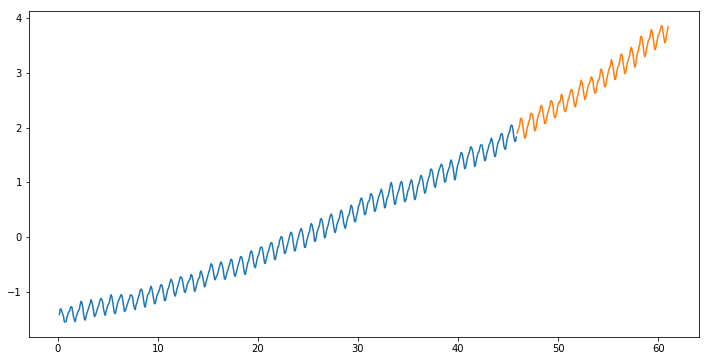

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(X_train['year'],  y_train)
plt.plot(X_test['year'],  y_test)
plt.show()

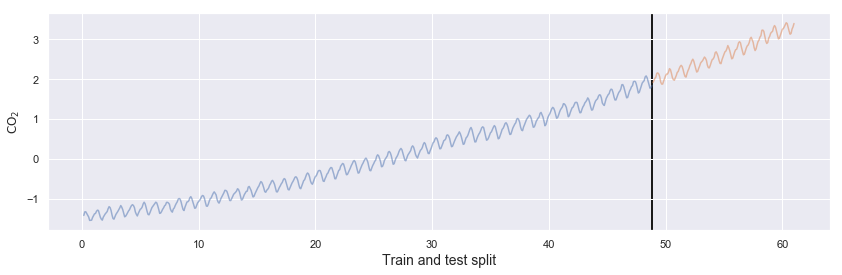

In [200]:
# >>> your code here <<<

<br>

### Task 4.2 (2 pt.)

Use [**GPy**](https://pypi.python.org/pypi/GPy) library for training and prediction. Fit a GP and run the predict on the test. Useful kernels to combine: `GPy.kern.RBF, GPy.kern.Poly, GPy.kern.StdPeriodic, GPy.kern.White, GPy.kern.Linear`. 

1. Plot mean and confidence interval of the prediction. 
2. Inspect them on normality by scatter plot: plot predicted points/time series against true values. 
3. Estimate the prediction error with `r2_score`. R2-score accepted > 0.83 on test sample.

In [64]:
from GPy.models import GPRegression
from GPy.kern import RBF, Poly, StdPeriodic, White, Linear
from sklearn.metrics import r2_score

 /Users/grigory/anaconda3/envs/kivy/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


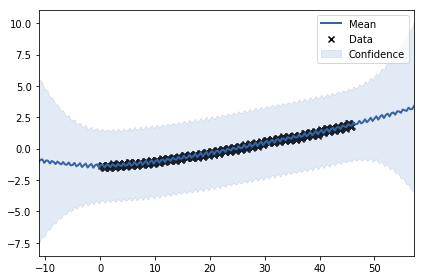

In [65]:
k = RBF(input_dim=1, variance=1., lengthscale=10.) + White(input_dim=1) + Poly(input_dim=1) + StdPeriodic(input_dim=1)

m = GPRegression(X_train['year'].values.reshape(-1, 1), y_train, k)
m.plot()
plt.show()

In [66]:
### BEGIN Solution
y_pred = m.predict(X_test['year'].values.reshape(-1, 1))
### END Solution

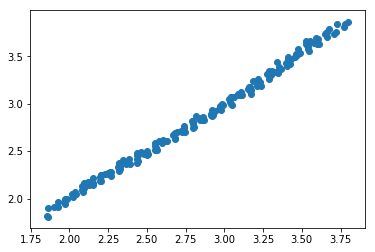

In [70]:
plt.scatter(y_pred[0], y_test)
plt.show()

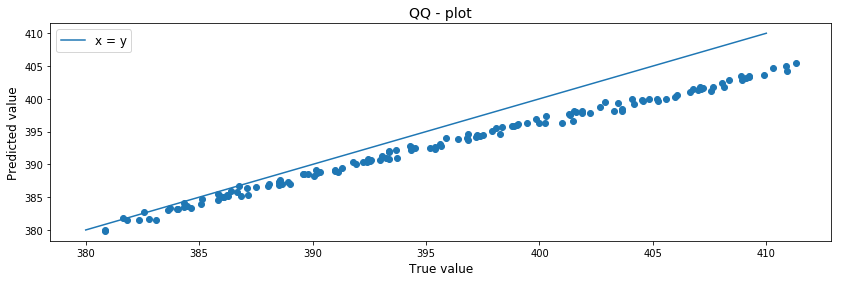

In [58]:
# >>> your code here <<<

In [67]:
r2_score(y_pred[0], y_test)

0.9936081619738791